In [11]:
#Importing necessary Python librarie
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Creating the data frame.
dataframe = pd.read_csv("Zomato-data-.csv")
print(dataframe.head())
#Getting summary of the dataframe use df.info()
dataframe.info()
#Checking for missing or null values to identify any data gaps.
print(dataframe.isnull().sum())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 

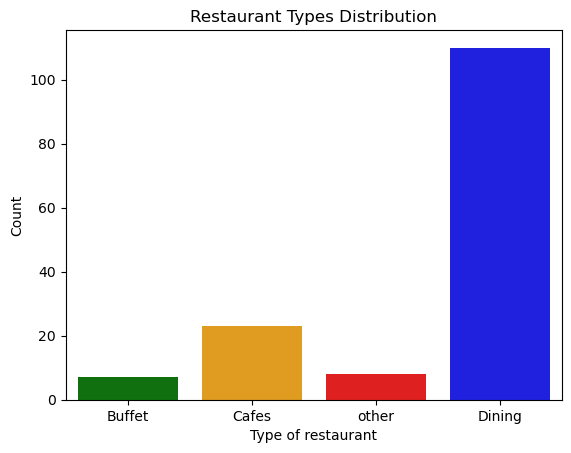

In [25]:
#Getting summary of the dataframe use df.info()
sns.countplot(
    x='listed_in(type)',
    data=dataframe,
    hue='listed_in(type)',        # map same column to hue
    legend=False,                 # hide duplicate legend
    palette=['green','orange','red','blue']
)

plt.xlabel("Type of restaurant")
plt.ylabel("Count")
plt.title("Restaurant Types Distribution")
plt.show()

Text(0, 0.5, 'Votes')

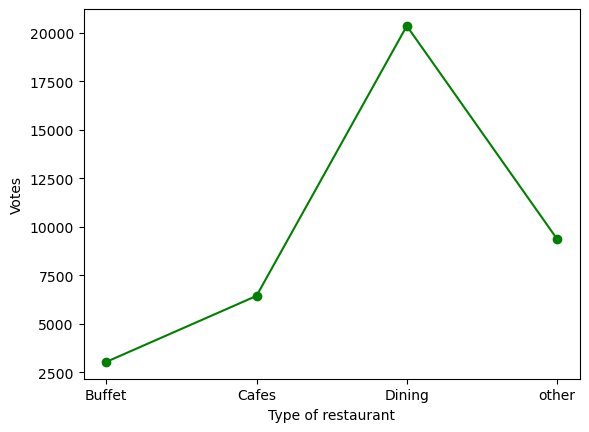

In [14]:
#Votes by Restaurant Type
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c='green', marker='o')
plt.xlabel('Type of restaurant')
plt.ylabel('Votes')

In [15]:
#Identify the Most Voted Restaurant
max_votes = dataframe['votes'].max()
restaurant_with_max_votes = dataframe.loc[dataframe['votes'] == max_votes, 'name']

print('Restaurant(s) with the maximum votes:')
print(restaurant_with_max_votes)

Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


<Axes: xlabel='online_order', ylabel='count'>

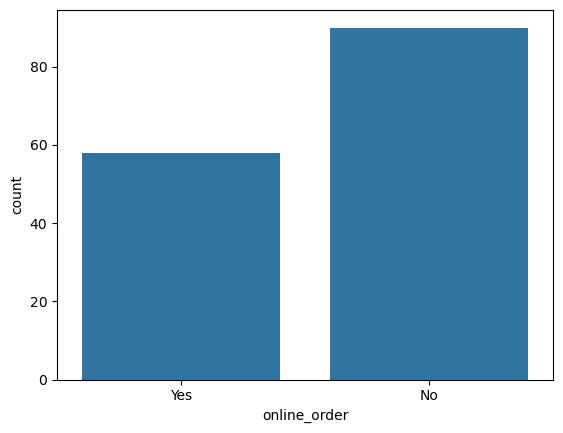

In [16]:
#Online Order Availability
sns.countplot(x=dataframe['online_order'])

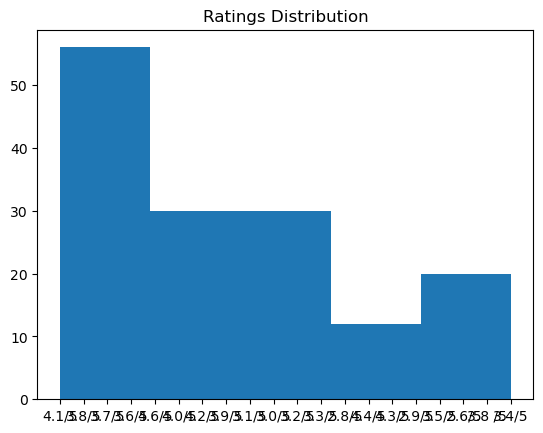

In [17]:
#Analyze Ratings
plt.hist(dataframe['rate'],bins=5)
plt.title('Ratings Distribution')
plt.show()

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

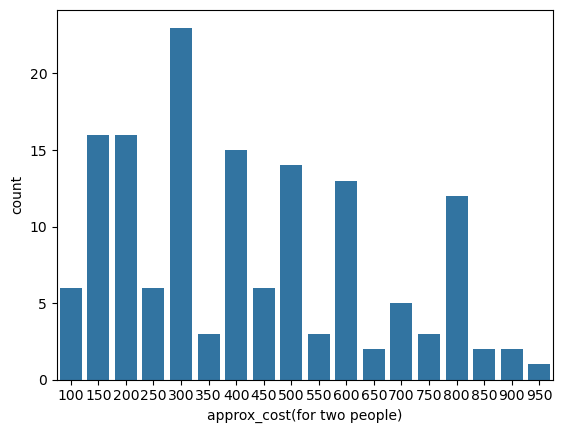

In [18]:
#Approximate Cost for Couples
couple_data=dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)

<Axes: xlabel='online_order', ylabel='rate'>

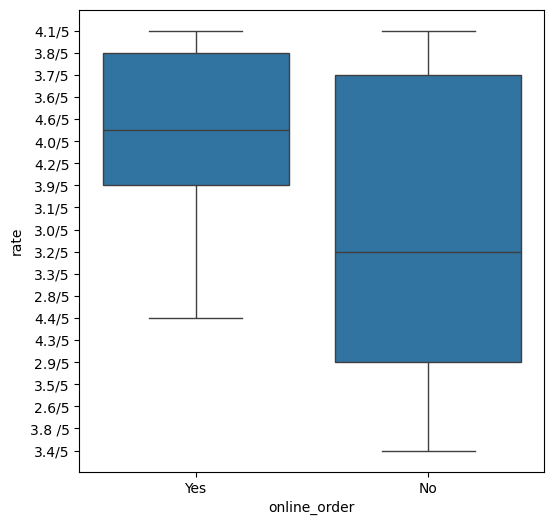

In [19]:
#Ratings Comparison - Online vs Offline Orders
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = dataframe)

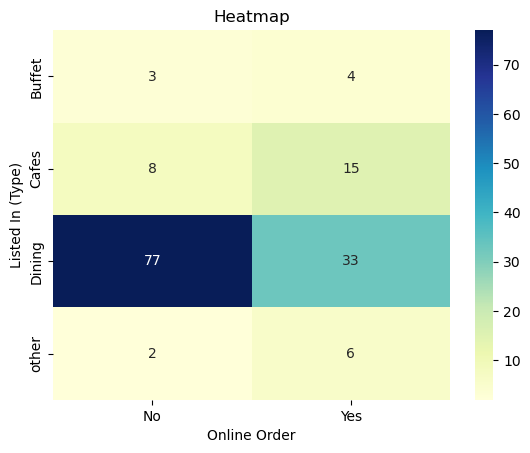

In [20]:
#Order Mode Preferences by Restaurant Type
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()